## This notebook generates the figures on non-independent (correlated) noise models. 

In [16]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os
import matplotlib.transforms as mtransforms

## Functions for importing data

In [17]:
def translate_one_decoder(decoder_data, file_decoder_data ,probability=None):

    d = int(file_decoder_data['n_k_d'][2])
    if probability != None:
        if file_decoder_data['error_probability'] != probability:
            return(decoder_data)
    
    if d not in decoder_data:
        decoder_data[d] = dict()
        decoder_data[d]['n_run'] = 0
        decoder_data[d]['n_fail'] = 0
    
    decoder_data[d]['n_fail'] += file_decoder_data['n_fail']
    decoder_data[d]['n_run'] += file_decoder_data['n_run']
    return(decoder_data)
    
def translate_file(file_name, data,probability):
    with open(file_name) as f:
        try:
            file_data = json.load(f)
        except:
            return(data)

    for key in file_data:
        if key not in data:
            data[key] = dict()
        for new_data in file_data[key]:
            data[key] = translate_one_decoder(data[key], new_data,probability)
    return(data)

def translate_all_files(folder_name, probability=None):
    code_dict = dict()
    n=0

    for file in os.listdir('./data/'+str(folder_name)):
        n+=1
        code_dict = translate_file(
            './data/' + str(folder_name) +'/' + str(file), code_dict,probability)

    return(code_dict)


## Functions for translating data for figure 11 (calculating logical error rates and error bars)

In [18]:
def translate_data(data):
    distance_array = []
    ler_array_curve_independent = []
    ler_eb_array_curve_independent = []
    ler_array_curve_independent_deg = []
    ler_eb_array_curve_independent_deg = []
    for distance in data['curve_independent']:
        if distance > 4:
            distance_array.append(int(distance))

    distance_array.sort()
    for distance in distance_array:
        ler_array_curve_independent.append(
            data['curve_independent'][distance]['n_fail']/data['curve_independent'][distance]['n_run'])
        ler_eb_array_curve_independent.append(np.sqrt(
            (1-ler_array_curve_independent[-1])*ler_array_curve_independent[-1]/data['curve_independent'][distance]['n_run']))
        ler_array_curve_independent_deg.append(
            data['curve_independent_deg'][distance]['n_fail']/data['curve_independent_deg'][distance]['n_run'])
        ler_eb_array_curve_independent_deg.append(np.sqrt(
            (1-ler_array_curve_independent_deg[-1])*ler_array_curve_independent_deg[-1]/data['curve_independent_deg'][distance]['n_run']))
    return(distance_array, ler_array_curve_independent, ler_eb_array_curve_independent, ler_array_curve_independent_deg, ler_eb_array_curve_independent_deg)

def translate_data_b(data):
    distance_array = []
    ler_array_curve_independent = []
    ler_eb_array_curve_independent = []
    ler_array_curve_independent_deg = []
    ler_eb_array_curve_independent_deg = []
    for distance in data['independent']:
        if distance > 4:
            distance_array.append(int(distance))
    distance_array.sort()
    for distance in distance_array:
        ler_array_curve_independent.append(
            data['independent'][distance]['n_fail']/data['independent'][distance]['n_run'])
        ler_eb_array_curve_independent.append(np.sqrt(
            (1-ler_array_curve_independent[-1])*ler_array_curve_independent[-1]/data['independent'][distance]['n_run']))
        ler_array_curve_independent_deg.append(
            data['independent_deg'][distance]['n_fail']/data['independent_deg'][distance]['n_run'])
        ler_eb_array_curve_independent_deg.append(np.sqrt(
            (1-ler_array_curve_independent_deg[-1])*ler_array_curve_independent_deg[-1]/data['independent_deg'][distance]['n_run']))
    return(distance_array, ler_array_curve_independent, ler_eb_array_curve_independent, ler_array_curve_independent_deg, ler_eb_array_curve_independent_deg)



## Generate figure 7

In [19]:

data = translate_all_files('fig_7_data/')

distance_array = []
ler_array_curve_independent = []
ler_eb_array_curve_independent = []
ler_array_curve_independent_deg = []
ler_eb_array_curve_independent_deg = []
ler_array_curve_correlated_deg = []
ler_eb_array_curve_correlated_deg = []
for distance in data['curve_independent']:
    if distance > 4:
        distance_array.append(int(distance))
        ler_array_curve_independent.append(data['curve_independent'][distance]['n_fail']/data['curve_independent'][distance]['n_run'])
        ler_eb_array_curve_independent.append(np.sqrt(
            (1-ler_array_curve_independent[-1])*ler_array_curve_independent[-1]/data['curve_independent'][distance]['n_run']))
        ler_array_curve_independent_deg.append(data['curve_independent_deg'][distance]['n_fail']/data['curve_independent_deg'][distance]['n_run'])
        ler_eb_array_curve_independent_deg.append(np.sqrt(
            (1-ler_array_curve_independent_deg[-1])*ler_array_curve_independent_deg[-1]/data['curve_independent_deg'][distance]['n_run']))
        ler_array_curve_correlated_deg.append(data['curve_correlated_deg'][distance]['n_fail']/data['curve_correlated_deg'][distance]['n_run'])
        ler_eb_array_curve_correlated_deg.append(np.sqrt(
            (1-ler_array_curve_correlated_deg[-1])*ler_array_curve_correlated_deg[-1]/data['curve_correlated_deg'][distance]['n_run']))

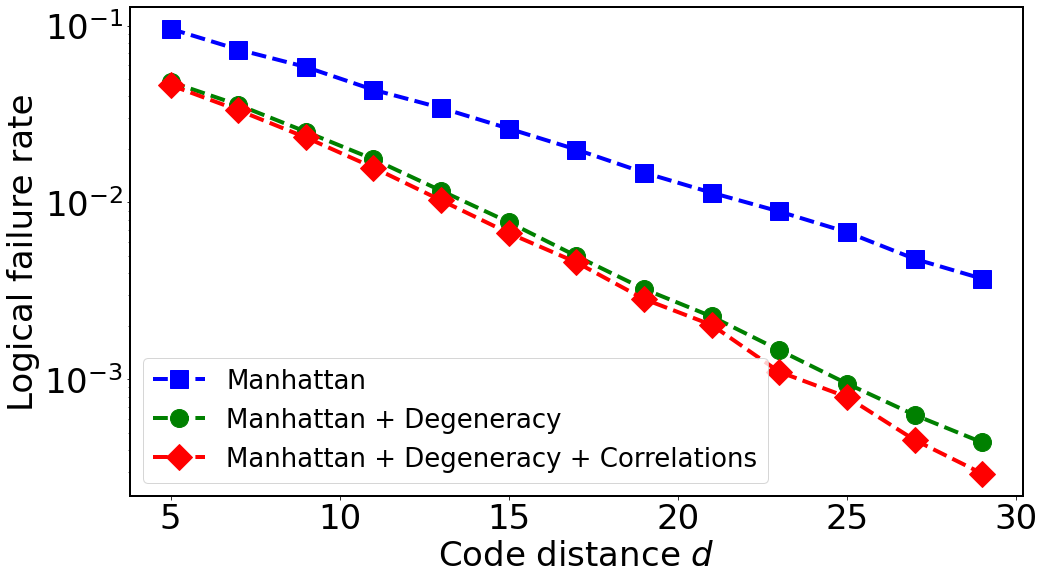

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [20]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(distance_array, ler_array_curve_independent, color='blue', marker='s', linestyle='dashed',
    linewidth=4, markersize=18, label='Manhattan')
ax.plot(distance_array, ler_array_curve_independent_deg, color='green', marker='o', linestyle='dashed',
    linewidth=4, markersize=18, label='Manhattan + Degeneracy')
ax.plot(distance_array, ler_array_curve_correlated_deg, color='red', marker='D', linestyle='dashed',
    linewidth=4, markersize=18, label='Manhattan + Degeneracy + Correlations')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.legend(loc='lower left', prop={'size': 26})
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
plt.xlabel('Code distance $\it{d}$', size=34)
plt.ylabel('Logical failure rate', size=34)
plt.yscale('log')
plt.show()

fig.savefig('./7.eps', format='eps', bbox_inches='tight')

## Generate figure 13

In [21]:

a_data = translate_all_files('fig_13a_data/')
b_data = translate_all_files('fig_13b_data/',0.1)
c_data = translate_all_files('fig_13c_data/')
d_data = translate_all_files('fig_13d_data/',0.05)

d_a, ler_ind_a, ler_eb_a, ler_ind_deg_a, ler_eb_ind_deg_a = translate_data(a_data)
d_b, ler_ind_b, ler_eb_b, ler_ind_deg_b, ler_eb_ind_deg_b = translate_data_b(b_data, )
d_c, ler_ind_c, ler_eb_c, ler_ind_deg_c, ler_eb_ind_deg_c = translate_data(c_data)
d_d, ler_ind_d, ler_eb_d, ler_ind_deg_d, ler_eb_ind_deg_d = translate_data(d_data)


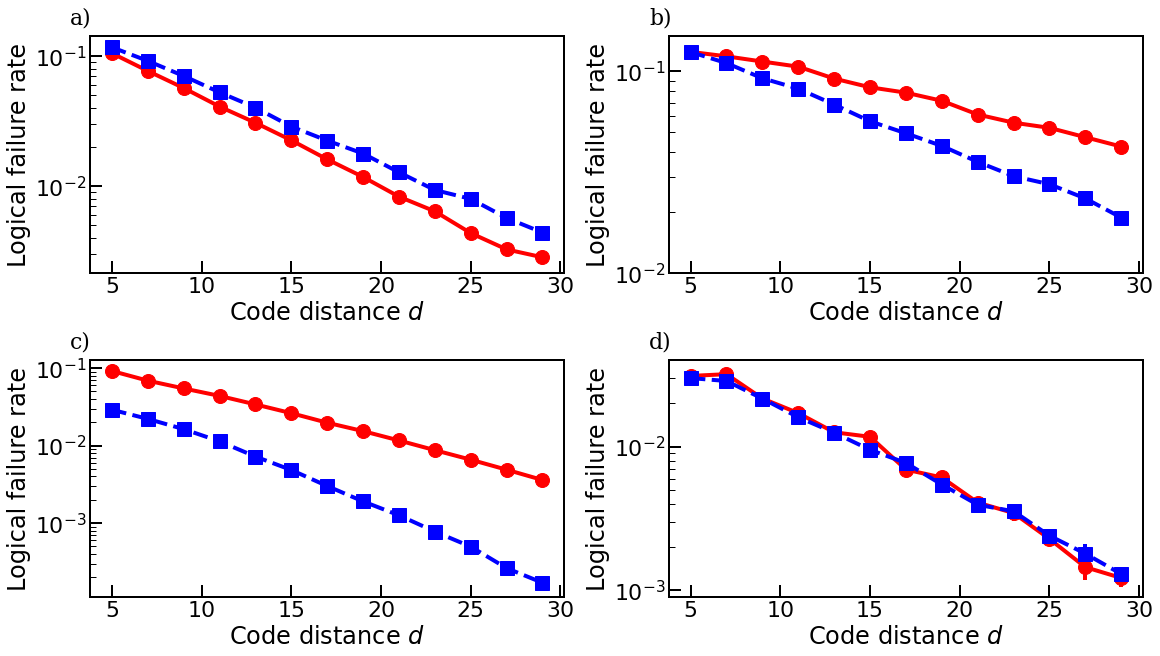

In [22]:
fig,axs = plt.subplot_mosaic([['a)', 'b)'], ['c)', 'd)']], constrained_layout=True, figsize=(16, 9))
def subplot(ax, distance_array, ler_array_curve_independent, ler_eb_array_curve_independent, ler_array_curve_independent_deg, ler_eb_array_curve_independent_deg):
    ax.errorbar(distance_array, ler_array_curve_independent, yerr=ler_eb_array_curve_independent, color='red', marker='o', linestyle='solid', linewidth=4, markersize=14, label='Manhattan')
    ax.errorbar(distance_array, ler_array_curve_independent_deg, yerr=ler_eb_array_curve_independent_deg, color='blue', marker='s', linestyle='dashed', linewidth=4, markersize=14, label='Manhattan')
    ax.set_yscale('log')
    ax.set_xlabel('Code distance $\it{d}$', size=24)
    ax.set_ylabel('Logical failure rate', size=24)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params(axis='both', labelsize=16, direction='in', length=12, width=2)
    ax.tick_params(axis='both', which='minor', direction='in', length=6, width=1)
    ax.tick_params(axis='both', labelsize=22)



subplot(axs['a)'], d_a, ler_ind_a, ler_eb_a, ler_ind_deg_a, ler_eb_ind_deg_a)
subplot(axs['b)'], d_b, ler_ind_b, ler_eb_b, ler_ind_deg_b, ler_eb_ind_deg_b)
subplot(axs['c)'], d_c, ler_ind_c, ler_eb_c, ler_ind_deg_c, ler_eb_ind_deg_c)
subplot(axs['d)'], d_d, ler_ind_d, ler_eb_d, ler_ind_deg_d, ler_eb_ind_deg_d)


for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=22, va='bottom', fontfamily='serif')

axs['b)'].set_ylim(0.01,0.15)
plt.show()
fig.savefig('./13.eps', format='eps', bbox_inches='tight')